# Lab 1: Perceptions and Linear Separability
**Student Name:** Michael Ferry

**Student ID**  G00420185

**Date:** 4th February 2026  

**Module:** Artificial Intelligence

## Introduction

### Setup

In [15]:
import numpy as np
import matplotlib.pyplot as plt
# Set random seed for reproducibility
np.random.seed(42)
# Configure matplotlib for better display
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.size'] = 12

## Exercise 1: Implement a Perceptron Class

In [16]:
class Perceptron:

    def __init__(self, n_inputs, learning_rate=0.1):
        """Initialise the perceptron."""
        self.weights = np.random.uniform(-0.5, 0.5, n_inputs)
        self.bias = np.random.uniform(-0.5, 0.5)
        self.learning_rate = learning_rate

    def step_function(self, x):
        """Step activation function."""
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        """Compute the perceptron output for given inputs."""
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.step_function(weighted_sum)

    def train(self, X, y, epochs, verbose=True):
        """Train the perceptron using the perceptron learning rule."""
        history = []
        history.append((self.weights.copy(), self.bias))

        for epoch in range(epochs):
            total_error = 0
            for i in range(len(X)):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                total_error += abs(error)

                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

            history.append((self.weights.copy(), self.bias))

            if verbose:
                print(
                    f"Epoch {epoch + 1}: weights = {self.weights}, "
                    f"bias = {self.bias:.4f}, errors = {total_error}"
                )

            if total_error == 0:
                if verbose:
                    print(f"Converged after {epoch + 1} epochs!")
                break

        return history

## Exercise 2: Train the Perceptron for Logical AND

#### Task 2.1: Define the Training Data

In [17]:
# Define training data for AND
X_and = np.array([
[0, 0],
[0, 1],
[1, 0],
[1, 1]
])
y_and = np.array([0, 0, 0, 1])
print("AND Training Data:")
print("X:")
print(X_and)
print("y:", y_and)

AND Training Data:
X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
y: [0 0 0 1]


#### Task 2.2: Train and Test the Perceptron

In [18]:
# Create perceptron
perceptron_and = Perceptron(n_inputs=2, learning_rate=0.1)
print("Initial weights:", perceptron_and.weights)
print("Initial bias:", perceptron_and.bias)
print("\nTraining...\n")
# Train (store the history for later visualisation)
history_and = perceptron_and.train(X_and, y_and, epochs=10)
# Test on all inputs
print("\nTesting AND perceptron:")
print("-" * 40)
all_correct = True
for i in range(len(X_and)):
    prediction = perceptron_and.predict(X_and[i])
    correct = "✓" if prediction == y_and[i] else "✗"
if prediction != y_and[i]:
    all_correct = False
print(f"Input: {X_and[i]} -> Predicted: {prediction}, Expected: {y_and[i]} {correct}")
print("-" * 40)
print(f"All predictions correct: {all_correct}")

Initial weights: [-0.12545988  0.45071431]
Initial bias: 0.2319939418114051

Training...

Epoch 1: weights = [-0.12545988  0.35071431], bias = 0.0320, errors = 2
Epoch 2: weights = [-0.02545988  0.35071431], bias = -0.0680, errors = 3
Epoch 3: weights = [-0.02545988  0.25071431], bias = -0.1680, errors = 1
Epoch 4: weights = [0.07454012 0.25071431], bias = -0.1680, errors = 2
Epoch 5: weights = [0.17454012 0.25071431], bias = -0.1680, errors = 2
Epoch 6: weights = [0.17454012 0.15071431], bias = -0.2680, errors = 1
Epoch 7: weights = [0.17454012 0.15071431], bias = -0.2680, errors = 0
Converged after 7 epochs!

Testing AND perceptron:
----------------------------------------
Input: [1 1] -> Predicted: 1, Expected: 1 ✓
----------------------------------------
All predictions correct: True


#### Task 2.3: Visualise the Decision Boundary

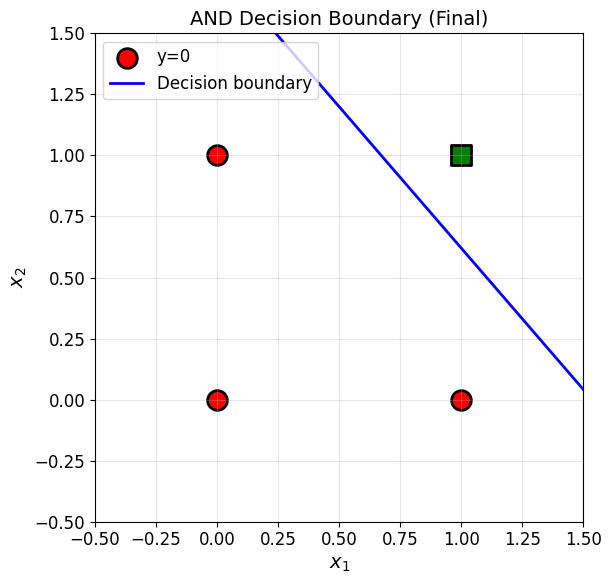

In [21]:
# Plotting function
def plot_decision_boundary(X, y, weights, bias, title="Decision Boundary", ax=None):
    """Plot data points and decision boundary."""
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))

    for i in range(len(X)):
        if y[i] == 0:
            ax.scatter(
                X[i, 0], X[i, 1], c='red', marker='o', s=200,
                edgecolors='black', linewidths=2, label='y=0' if i == 0 else ''
            )
        else:
            ax.scatter(
                X[i, 0], X[i, 1], c='green', marker='s', s=200,
                edgecolors='black', linewidths=2, label='y=1' if i == 1 else ''
            )

    x1_range = np.linspace(-0.5, 1.5, 100)
    if abs(weights[1]) > 1e-10:
        x2_boundary = -(weights[0] / weights[1]) * x1_range - (bias / weights[1])
        ax.plot(x1_range, x2_boundary, 'b-', linewidth=2, label='Decision boundary')
    else:
        if abs(weights[0]) > 1e-10:
            x1_boundary = -bias / weights[0]
            ax.axvline(x=x1_boundary, color='b', linewidth=2, label='Decision boundary')

    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlabel('$x_1$', fontsize=14)
    ax.set_ylabel('$x_2$', fontsize=14)
    ax.set_title(title, fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper left')
    ax.set_aspect('equal')
    return ax

# Test the plotting function with the trained AND perceptron
plot_decision_boundary(
    X_and, y_and, perceptron_and.weights, perceptron_and.bias,
    "AND Decision Boundary (Final)"
 )
plt.tight_layout()
plt.show()

#### Task 2.4: Animate the Learning Process

AND - Decision Boundary Evolution:


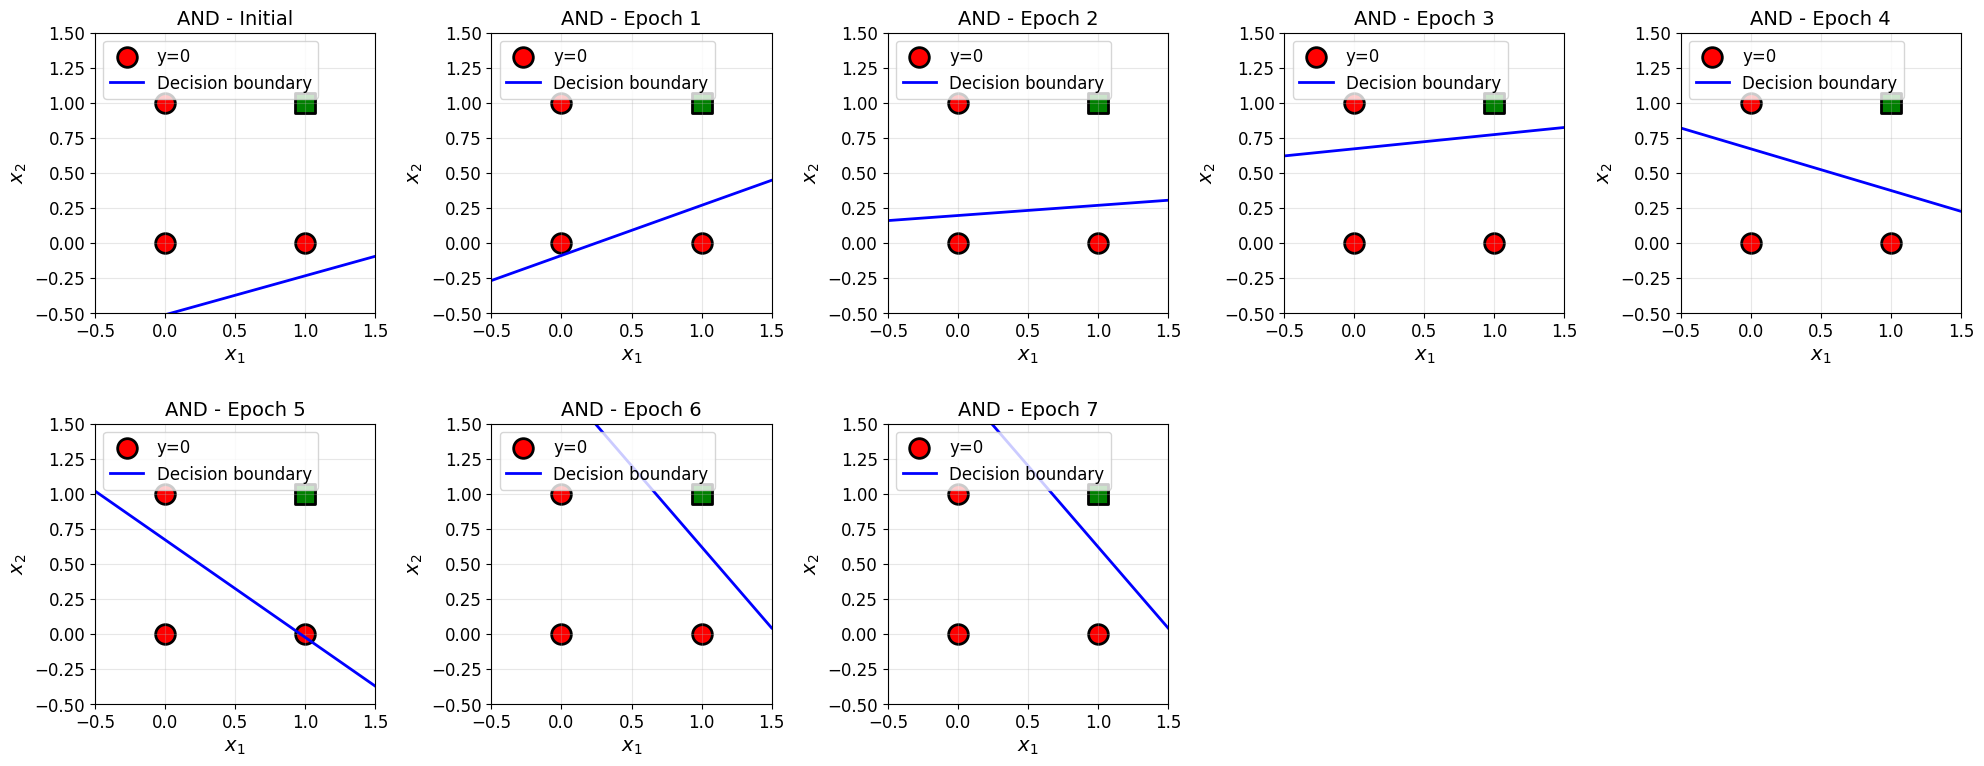

In [22]:
# Visualise decision boundary evolution across epochs
def plot_training_evolution(X, y, history, title_prefix=""):
    """Plot decision boundary evolution across training epochs."""
    n_epochs = len(history)
    n_cols = min(5, n_epochs)
    n_rows = (n_epochs + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
    if n_rows == 1:
        axes = np.array([axes])

    for idx, (weights, bias) in enumerate(history):
        row = idx // n_cols
        col = idx % n_cols
        ax = axes[row, col]
        epoch_label = "Initial" if idx == 0 else f"Epoch {idx}"
        plot_decision_boundary(X, y, weights, bias, f"{title_prefix}{epoch_label}", ax=ax)

    for idx in range(n_epochs, n_rows * n_cols):
        row = idx // n_cols
        col = idx % n_cols
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

print("AND - Decision Boundary Evolution:")
plot_training_evolution(X_and, y_and, history_and, "AND - ")

#### Task 2.5: Display Weight Updates Table

In [23]:
import pandas as pd

def create_weight_table(history):
    """Create a pandas DataFrame showing weights at each epoch."""
    data = {
        'Epoch': [],
        'w₁': [],
        'w₂': [],
        'bias': []
    }

    for epoch, (weights, bias) in enumerate(history):
        data['Epoch'].append('Initial' if epoch == 0 else epoch)
        data['w₁'].append(f"{weights[0]:.4f}")
        data['w₂'].append(f"{weights[1]:.4f}")
        data['bias'].append(f"{bias:.4f}")

    return pd.DataFrame(data)

print("AND - Weight History Table:")
df_and = create_weight_table(history_and)
display(df_and)

AND - Weight History Table:


,Epoch,w₁,w₂,bias
0,Initial,-0.1255,0.4507,0.2320
1,1,-0.1255,0.3507,0.0320
2,2,-0.0255,0.3507,-0.0680
3,3,-0.0255,0.2507,-0.1680
4,4,0.0745,0.2507,-0.1680
5,5,0.1745,0.2507,-0.1680
6,6,0.1745,0.1507,-0.2680
7,7,0.1745,0.1507,-0.2680


## Exercise 3: Train the Perceptron

#### 3.1.1. Define the training data

In [24]:
# OR training data
X_or = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], dtype=float)
y_or = np.array([0, 1, 1, 1])

print("OR Training Data:")
print("X:")
print(X_or)
print("y:", y_or)

OR Training Data:
X:
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
y: [0 1 1 1]


#### 3.1.2. Train a new perceptron

In [25]:
# Create and train OR perceptron
np.random.seed(42)
perceptron_or = Perceptron(n_inputs=2, learning_rate=0.1)

print("Initial OR weights:", perceptron_or.weights)
print("Initial OR bias:", perceptron_or.bias)
print("\nTraining OR perceptron...\n")

history_or = perceptron_or.train(X_or, y_or, epochs=10, verbose=True)

Initial OR weights: [-0.12545988  0.45071431]
Initial OR bias: 0.2319939418114051

Training OR perceptron...

Epoch 1: weights = [-0.12545988  0.45071431], bias = 0.1320, errors = 1
Epoch 2: weights = [-0.02545988  0.45071431], bias = 0.1320, errors = 2
Epoch 3: weights = [-0.02545988  0.45071431], bias = 0.0320, errors = 1
Epoch 4: weights = [0.07454012 0.45071431], bias = 0.0320, errors = 2
Epoch 5: weights = [0.07454012 0.45071431], bias = -0.0680, errors = 1
Epoch 6: weights = [0.07454012 0.45071431], bias = -0.0680, errors = 0
Converged after 6 epochs!


#### 3.1.3. Test and verify

Testing OR perceptron:
----------------------------------------
Input: [0. 0.] -> Predicted: 0, Expected: 0 ✓
Input: [0. 1.] -> Predicted: 1, Expected: 1 ✓
Input: [1. 0.] -> Predicted: 1, Expected: 1 ✓
Input: [1. 1.] -> Predicted: 1, Expected: 1 ✓
----------------------------------------
All OR predictions correct: True


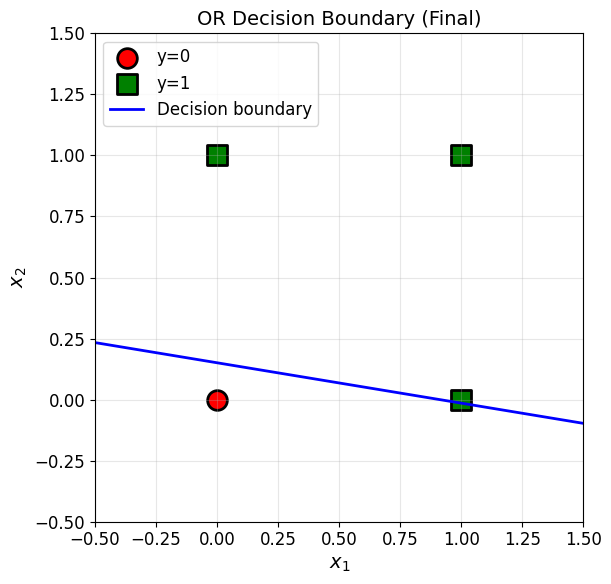

OR - Weight History Table:


,Epoch,w₁,w₂,bias
0,Initial,-0.1255,0.4507,0.2320
1,1,-0.1255,0.4507,0.1320
2,2,-0.0255,0.4507,0.1320
3,3,-0.0255,0.4507,0.0320
4,4,0.0745,0.4507,0.0320
5,5,0.0745,0.4507,-0.0680
6,6,0.0745,0.4507,-0.0680


In [26]:
# Test OR perceptron
print("Testing OR perceptron:")
print("-" * 40)
all_correct_or = True
for i in range(len(X_or)):
    prediction = perceptron_or.predict(X_or[i])
    correct = "✓" if prediction == y_or[i] else "✗"
    if prediction != y_or[i]:
        all_correct_or = False
    print(f"Input: {X_or[i]} -> Predicted: {prediction}, Expected: {y_or[i]} {correct}")
print("-" * 40)
print(f"All OR predictions correct: {all_correct_or}")

# Plot OR decision boundary
plot_decision_boundary(
    X_or, y_or, perceptron_or.weights, perceptron_or.bias,
    "OR Decision Boundary (Final)"
 )
plt.tight_layout()
plt.show()

# Show OR weight history table
print("OR - Weight History Table:")
df_or = create_weight_table(history_or)
display(df_or)

#### Visualise the decision boundary (part of Task 3.2)

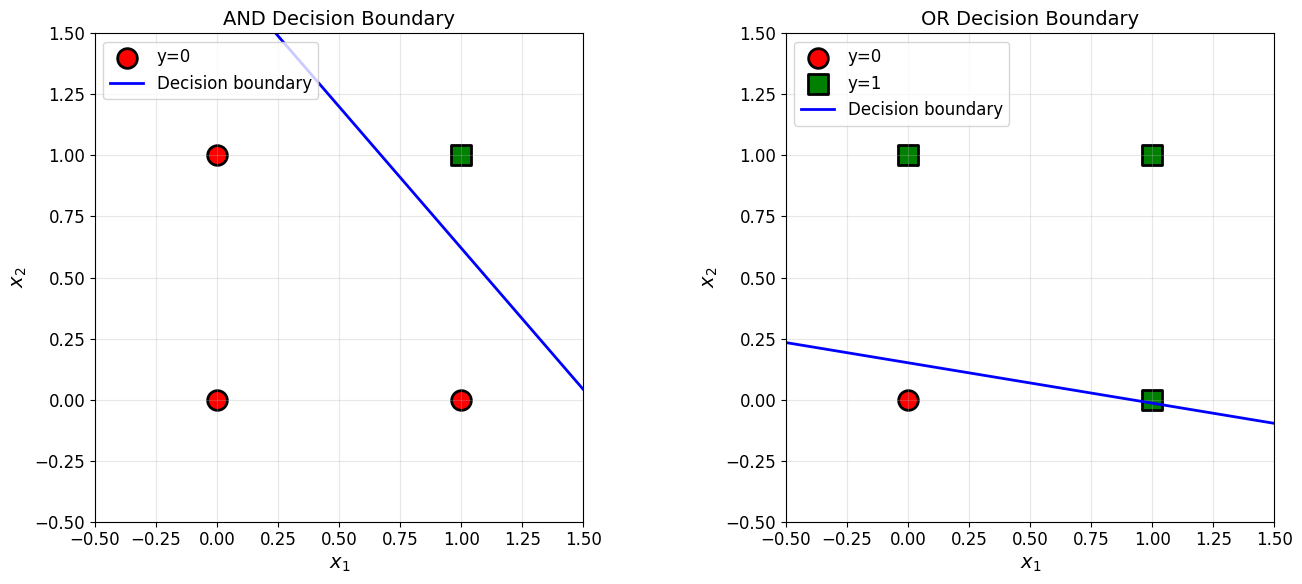

Discussion:
------------------------------------------------------------
AND: The decision boundary separates (1,1) from the other three points.
The line passes above most points, classifying only the top-right as 1.

OR: The decision boundary separates (0,0) from the other three points.
The line passes below most points, classifying only the origin as 0.

Both are solvable because in each case, the two classes can be separated
by a single straight line - they are LINEARLY SEPARABLE.


In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

plot_decision_boundary(
    X_and, y_and, perceptron_and.weights, perceptron_and.bias,
    "AND Decision Boundary", ax=ax1
)
plot_decision_boundary(
    X_or, y_or, perceptron_or.weights, perceptron_or.bias,
    "OR Decision Boundary", ax=ax2
)

plt.tight_layout()
plt.show()

print("Discussion:")
print("-" * 60)
print("AND: The decision boundary separates (1,1) from the other three points.")
print("The line passes above most points, classifying only the top-right as 1.")
print()
print("OR: The decision boundary separates (0,0) from the other three points.")
print("The line passes below most points, classifying only the origin as 0.")
print()
print("Both are solvable because in each case, the two classes can be separated")
print("by a single straight line - they are LINEARLY SEPARABLE.")

## Exercise 4: The XOR Problem – Demonstrating Linear Inseparability

#### Task 4.1: Attempt to Train a Single Perceptron for XOR

##### 4.1.1. Define XOR training data: 

In [28]:
# XOR training data
X_xor = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], dtype=float)
y_xor = np.array([0, 1, 1, 0])

print("XOR Training Data:")
print("X:")
print(X_xor)
print("y:", y_xor)

XOR Training Data:
X:
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
y: [0 1 1 0]


##### 4.1.2. Attempt to train a perceptron for XOR:

In [29]:
np.random.seed(42)
perceptron_xor = Perceptron(n_inputs=2, learning_rate=0.1)
history_xor = perceptron_xor.train(X_xor, y_xor, epochs=30, verbose=False)

print("XOR training complete.")
print(f"Epochs run: {len(history_xor) - 1}")
print(f"Final weights: {perceptron_xor.weights}")
print(f"Final bias: {perceptron_xor.bias:.4f}")

XOR training complete.
Epochs run: 30
Final weights: [-0.22545988  0.05071431]
Final bias: 0.0320


##### 4.1.3. Test the XOR perceptron and show it fails: G

In [30]:
print("Testing XOR perceptron (expected to fail for at least one case):")
print("-" * 55)
n_correct = 0
for i in range(len(X_xor)):
    pred = perceptron_xor.predict(X_xor[i])
    expected = y_xor[i]
    correct = "✓" if pred == expected else "⚠️"
    if pred == expected:
        n_correct += 1
    print(f"Input: {X_xor[i]} -> Predicted: {pred}, Expected: {expected} {correct}")
print("-" * 55)
print(f"Accuracy: {n_correct}/{len(X_xor)} = {100 * n_correct / len(X_xor):.1f}%")
print("A single perceptron cannot solve XOR because XOR is not linearly separable.")

Testing XOR perceptron (expected to fail for at least one case):
-------------------------------------------------------
Input: [0. 0.] -> Predicted: 1, Expected: 0 ⚠️
Input: [0. 1.] -> Predicted: 1, Expected: 1 ✓
Input: [1. 0.] -> Predicted: 0, Expected: 1 ⚠️
Input: [1. 1.] -> Predicted: 0, Expected: 0 ✓
-------------------------------------------------------
Accuracy: 2/4 = 50.0%
A single perceptron cannot solve XOR because XOR is not linearly separable.


### Task 4.2: Visualise Why XOR is Linearly Inseparable

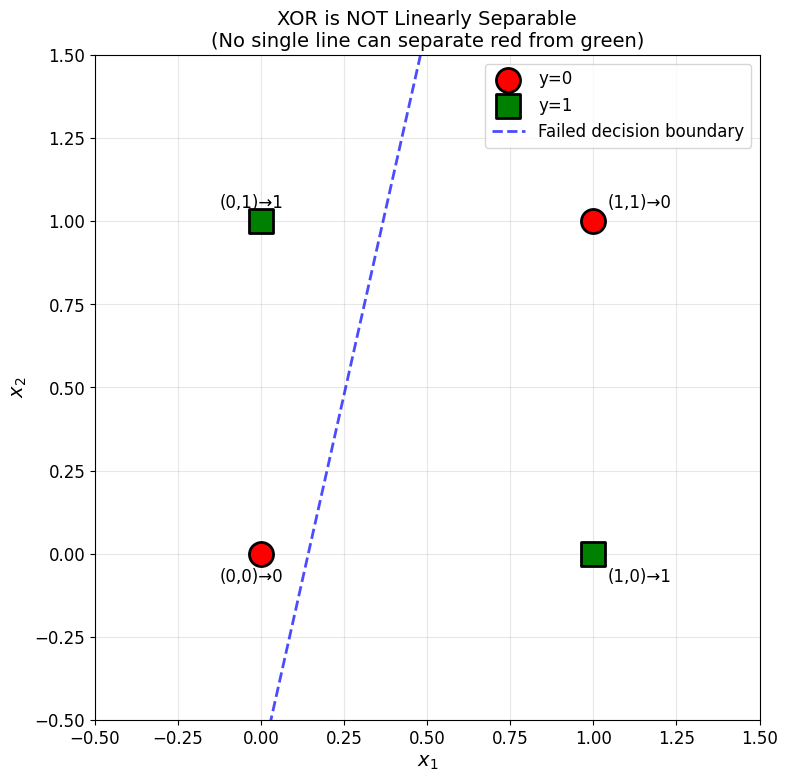

In [32]:
# Visualise XOR data points and failed decision boundary
fig, ax = plt.subplots(figsize=(8, 8))

for i in range(len(X_xor)):
    if y_xor[i] == 0:
        ax.scatter(
            X_xor[i, 0], X_xor[i, 1], c='red', marker='o', s=300,
            edgecolors='black', linewidths=2, zorder=5,
            label='y=0' if i == 0 else ''
        )
    else:
        ax.scatter(
            X_xor[i, 0], X_xor[i, 1], c='green', marker='s', s=300,
            edgecolors='black', linewidths=2, zorder=5,
            label='y=1' if i == 1 else ''
        )

ax.annotate('(0,0)→0', (0, 0), textcoords='offset points', xytext=(-30, -20), fontsize=12)
ax.annotate('(0,1)→1', (0, 1), textcoords='offset points', xytext=(-30, 10), fontsize=12)
ax.annotate('(1,0)→1', (1, 0), textcoords='offset points', xytext=(10, -20), fontsize=12)
ax.annotate('(1,1)→0', (1, 1), textcoords='offset points', xytext=(10, 10), fontsize=12)

x1_range = np.linspace(-0.5, 1.5, 100)
if abs(perceptron_xor.weights[1]) > 1e-10:
    x2_boundary = (
        -(perceptron_xor.weights[0] / perceptron_xor.weights[1]) * x1_range
        - (perceptron_xor.bias / perceptron_xor.weights[1])
    )
    ax.plot(
        x1_range, x2_boundary, 'b--', linewidth=2, alpha=0.7,
        label='Failed decision boundary'
    )

ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_title(
    'XOR is NOT Linearly Separable\n(No single line can separate red from green)',
    fontsize=14
)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.set_aspect('equal')
plt.tight_layout()
plt.show()

#### Task 4.3: Visualise AND, OR, and XOR Together

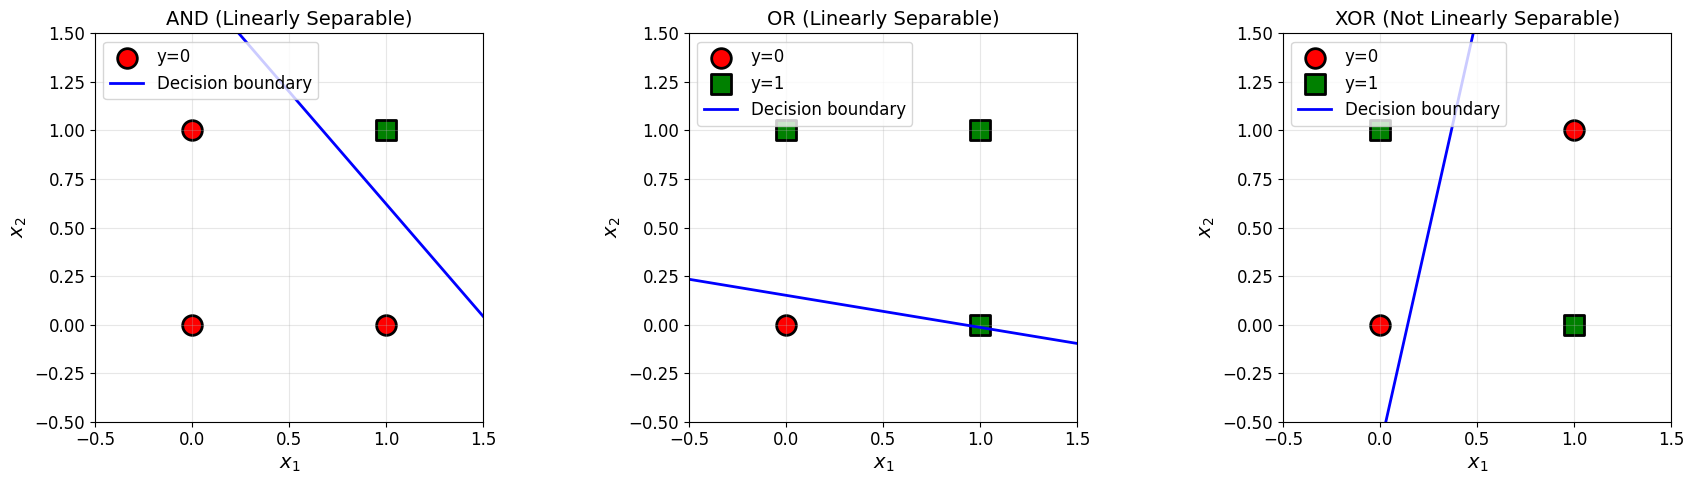

Figure saved as 'linear_separability_comparison.png'


In [33]:
# Create 3-panel comparison figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

plot_decision_boundary(
    X_and, y_and, perceptron_and.weights, perceptron_and.bias,
    "AND (Linearly Separable)", ax=ax1
)
plot_decision_boundary(
    X_or, y_or, perceptron_or.weights, perceptron_or.bias,
    "OR (Linearly Separable)", ax=ax2
)
plot_decision_boundary(
    X_xor, y_xor, perceptron_xor.weights, perceptron_xor.bias,
    "XOR (Not Linearly Separable)", ax=ax3
)

plt.tight_layout()
plt.savefig('linear_separability_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved as 'linear_separability_comparison.png'")

## Exercise 5: Two-Layer Perceptron for XOR

#### Task 5.1: Implement with Pre-defined Weights

In [34]:
# Two-layer perceptron with pre-defined weights
def xor_two_layer_manual(x1, x2, verbose=False):
    """Compute XOR using a two-layer perceptron with pre-defined weights."""
    step = lambda x: 1 if x >= 0 else 0

    # Hidden layer
    h1_sum = x1 * (-1) + x2 * (-1) + 1.5
    h1 = step(h1_sum)

    h2_sum = x1 * 1 + x2 * 1 - 0.5
    h2 = step(h2_sum)

    # Output layer (h1 AND h2)
    y_sum = h1 * 1 + h2 * 1 - 1.5
    y = step(y_sum)

    if verbose:
        print(f"Input: ({x1}, {x2})")
        print(f"Hidden 1: {x1}*(-1) + {x2}*(-1) + 1.5 = {h1_sum:.1f} -> h1 = {h1}")
        print(f"Hidden 2: {x1}*1 + {x2}*1 - 0.5 = {h2_sum:.1f} -> h2 = {h2}")
        print(f"Output: {h1}*1 + {h2}*1 - 1.5 = {y_sum:.1f} -> y = {y}")

    return y

print("Testing two-layer perceptron for XOR (manual weights):")
print("=" * 60)
all_correct = True
for x1 in [0, 1]:
    for x2 in [0, 1]:
        result = xor_two_layer_manual(x1, x2, verbose=True)
        expected = x1 ^ x2
        correct = "✓" if result == expected else "✗"
        if result != expected:
            all_correct = False
        print(f"Result: XOR({x1}, {x2}) = {result}, Expected: {expected} {correct}")
        print()
print("=" * 60)
print(f"All predictions correct: {all_correct}")

Testing two-layer perceptron for XOR (manual weights):
Input: (0, 0)
Hidden 1: 0*(-1) + 0*(-1) + 1.5 = 1.5 -> h1 = 1
Hidden 2: 0*1 + 0*1 - 0.5 = -0.5 -> h2 = 0
Output: 1*1 + 0*1 - 1.5 = -0.5 -> y = 0
Result: XOR(0, 0) = 0, Expected: 0 ✓

Input: (0, 1)
Hidden 1: 0*(-1) + 1*(-1) + 1.5 = 0.5 -> h1 = 1
Hidden 2: 0*1 + 1*1 - 0.5 = 0.5 -> h2 = 1
Output: 1*1 + 1*1 - 1.5 = 0.5 -> y = 1
Result: XOR(0, 1) = 1, Expected: 1 ✓

Input: (1, 0)
Hidden 1: 1*(-1) + 0*(-1) + 1.5 = 0.5 -> h1 = 1
Hidden 2: 1*1 + 0*1 - 0.5 = 0.5 -> h2 = 1
Output: 1*1 + 1*1 - 1.5 = 0.5 -> y = 1
Result: XOR(1, 0) = 1, Expected: 1 ✓

Input: (1, 1)
Hidden 1: 1*(-1) + 1*(-1) + 1.5 = -0.5 -> h1 = 0
Hidden 2: 1*1 + 1*1 - 0.5 = 1.5 -> h2 = 1
Output: 0*1 + 1*1 - 1.5 = -0.5 -> y = 0
Result: XOR(1, 1) = 0, Expected: 0 ✓

All predictions correct: True


#### Task 5.2: Visualise the Two Hyperplanes

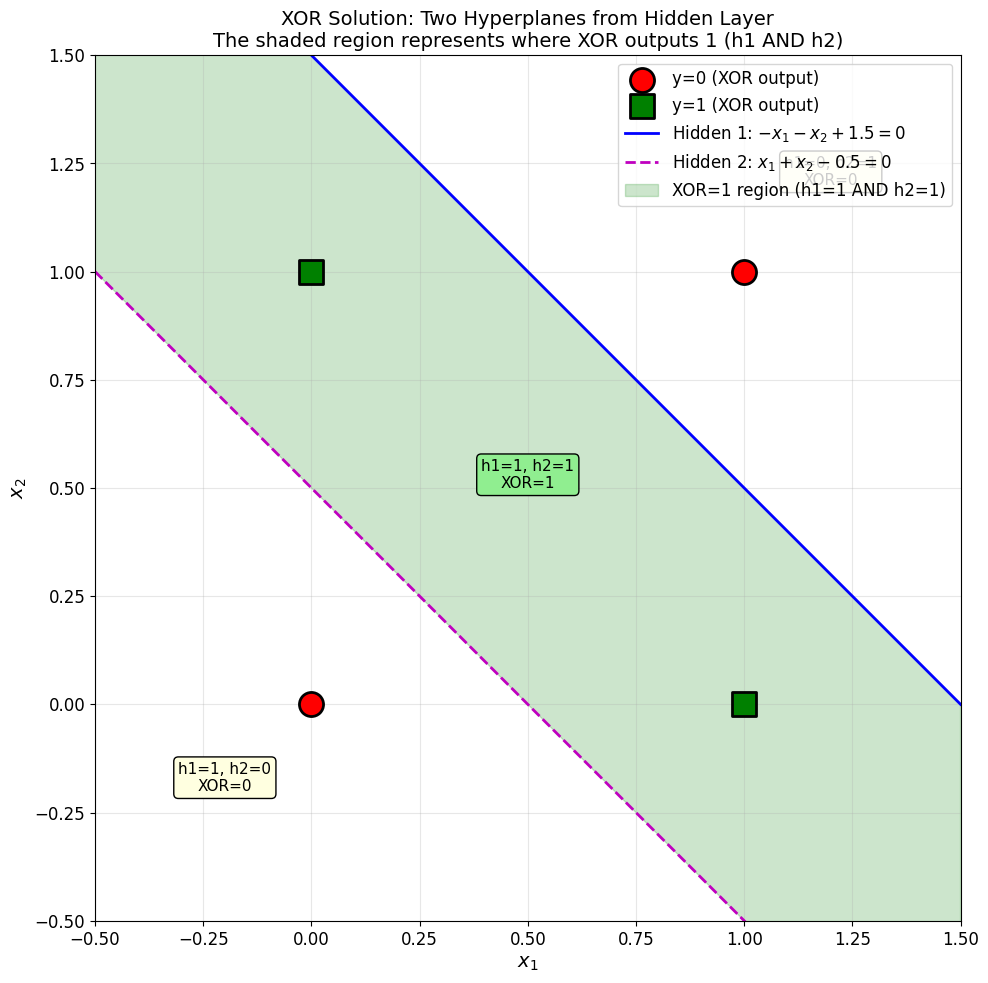

Figure saved as 'xor_two_hyperplanes.png'


In [35]:
# Visualise the two hyperplanes from the hidden layer
fig, ax = plt.subplots(figsize=(10, 10))

# Plot data points
for i in range(len(X_xor)):
    if y_xor[i] == 0:
        ax.scatter(
            X_xor[i, 0], X_xor[i, 1], c='red', marker='o', s=300,
            edgecolors='black', linewidths=2, zorder=5,
            label='y=0 (XOR output)' if i == 0 else ''
        )
    else:
        ax.scatter(
            X_xor[i, 0], X_xor[i, 1], c='green', marker='s', s=300,
            edgecolors='black', linewidths=2, zorder=5,
            label='y=1 (XOR output)' if i == 1 else ''
        )

x1_range = np.linspace(-0.5, 1.5, 100)

# Hidden neuron 1: -x1 - x2 + 1.5 = 0 => x2 = -x1 + 1.5
x2_h1 = -x1_range + 1.5
ax.plot(x1_range, x2_h1, 'b-', linewidth=2, label='Hidden 1: $-x_1 - x_2 + 1.5 = 0$')

# Hidden neuron 2: x1 + x2 - 0.5 = 0 => x2 = -x1 + 0.5
x2_h2 = -x1_range + 0.5
ax.plot(x1_range, x2_h2, 'm--', linewidth=2, label='Hidden 2: $x_1 + x_2 - 0.5 = 0$')

# Region where XOR = 1
ax.fill_between(
    x1_range, x2_h2, x2_h1, alpha=0.2, color='green',
    label='XOR=1 region (h1=1 AND h2=1)'
)

ax.annotate(
    'h1=1, h2=0\nXOR=0', xy=(-0.2, -0.2), fontsize=11, ha='center',
    bbox=dict(boxstyle='round', facecolor='lightyellow')
)
ax.annotate(
    'h1=1, h2=1\nXOR=1', xy=(0.5, 0.5), fontsize=11, ha='center',
    bbox=dict(boxstyle='round', facecolor='lightgreen')
)
ax.annotate(
    'h1=0, h2=1\nXOR=0', xy=(1.2, 1.2), fontsize=11, ha='center',
    bbox=dict(boxstyle='round', facecolor='lightyellow')
)

ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_title(
    'XOR Solution: Two Hyperplanes from Hidden Layer\n'
    'The shaded region represents where XOR outputs 1 (h1 AND h2)',
    fontsize=14
)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.set_aspect('equal')

plt.tight_layout()
plt.savefig('xor_two_hyperplanes.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved as 'xor_two_hyperplanes.png'")

#### Task 5.3: Implement a Trainable Two-Layer Network

In [36]:
class TwoLayerPerceptron:
    """A two-layer perceptron (MLP) for XOR using sigmoid activation."""

    def __init__(self, input_size=2, hidden_size=2, output_size=1, learning_rate=0.5):
        self.learning_rate = learning_rate
        self.weights_ih = np.random.uniform(-1, 1, (input_size, hidden_size))
        self.bias_h = np.random.uniform(-1, 1, hidden_size)
        self.weights_ho = np.random.uniform(-1, 1, (hidden_size, output_size))
        self.bias_o = np.random.uniform(-1, 1, output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

    def sigmoid_derivative(self, x):
        s = self.sigmoid(x)
        return s * (1 - s)

    def forward(self, X):
        self.z_h = np.dot(X, self.weights_ih) + self.bias_h
        self.a_h = self.sigmoid(self.z_h)
        self.z_o = np.dot(self.a_h, self.weights_ho) + self.bias_o
        self.a_o = self.sigmoid(self.z_o)
        return self.a_o

    def backward(self, X, y):
        m = X.shape[0]
        output_error = y - self.a_o
        output_delta = output_error * self.sigmoid_derivative(self.z_o)

        hidden_error = np.dot(output_delta, self.weights_ho.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.z_h)

        self.weights_ho += self.learning_rate * np.dot(self.a_h.T, output_delta) / m
        self.bias_o += self.learning_rate * np.mean(output_delta, axis=0)
        self.weights_ih += self.learning_rate * np.dot(X.T, hidden_delta) / m
        self.bias_h += self.learning_rate * np.mean(hidden_delta, axis=0)

    def train(self, X, y, epochs, verbose_interval=1000):
        losses = []
        for epoch in range(epochs):
            output = self.forward(X)
            loss = np.mean((output - y) ** 2)
            losses.append(loss)
            self.backward(X, y)

            if epoch % verbose_interval == 0:
                print(f"Epoch {epoch}: Loss = {loss:.6f}")

        return losses

    def predict(self, X):
        output = self.forward(X)
        return (output >= 0.5).astype(int).flatten()

print("Training two-layer network for XOR (with backpropagation):")
print("=" * 60)
np.random.seed(42)
y_xor_2d = y_xor.reshape(-1, 1)

mlp = TwoLayerPerceptron(hidden_size=4, learning_rate=2.0)
losses = mlp.train(X_xor, y_xor_2d, epochs=10001, verbose_interval=2000)

print("\nTesting trained network:")
print("-" * 40)
predictions = mlp.predict(X_xor)
for i in range(len(X_xor)):
    expected = int(y_xor[i])
    pred = int(predictions[i])
    correct = "✓" if pred == expected else "✗"
    print(f"XOR({int(X_xor[i][0])}, {int(X_xor[i][1])}) = {pred}, Expected: {expected} {correct}")
print("-" * 40)
accuracy = np.mean(predictions == y_xor) * 100
print(f"Accuracy: {accuracy:.1f}%")

Training two-layer network for XOR (with backpropagation):
Epoch 0: Loss = 0.315398
Epoch 2000: Loss = 0.002133
Epoch 4000: Loss = 0.000789
Epoch 6000: Loss = 0.000475
Epoch 8000: Loss = 0.000338
Epoch 10000: Loss = 0.000262

Testing trained network:
----------------------------------------
XOR(0, 0) = 0, Expected: 0 ✓
XOR(0, 1) = 1, Expected: 1 ✓
XOR(1, 0) = 1, Expected: 1 ✓
XOR(1, 1) = 0, Expected: 0 ✓
----------------------------------------
Accuracy: 100.0%


## Exercise 6: NAND Perceptron

In [37]:
print("Exercise 6: NAND Perceptron")
print("=" * 50)

X_nand = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], dtype=float)
y_nand = np.array([1, 1, 1, 0])

np.random.seed(42)
perceptron_nand = Perceptron(n_inputs=2, learning_rate=0.1)
history_nand = perceptron_nand.train(X_nand, y_nand, epochs=20, verbose=False)

print(f"Training completed in {len(history_nand)-1} epochs")
print(f"Final weights: {perceptron_nand.weights}")
print(f"Final bias: {perceptron_nand.bias:.4f}\n")

print("Testing NAND perceptron:")
for i in range(len(X_nand)):
    pred = perceptron_nand.predict(X_nand[i])
    expected = y_nand[i]
    mark = "✓" if pred == expected else "✗"
    print(f"Input {X_nand[i]} -> Predicted: {pred}, Expected: {expected} {mark}")

Exercise 6: NAND Perceptron
Training completed in 8 epochs
Final weights: [-0.22545988 -0.04928569]
Final bias: 0.2320

Testing NAND perceptron:
Input [0. 0.] -> Predicted: 1, Expected: 1 ✓
Input [0. 1.] -> Predicted: 1, Expected: 1 ✓
Input [1. 0.] -> Predicted: 1, Expected: 1 ✓
Input [1. 1.] -> Predicted: 0, Expected: 0 ✓


## Exercise 7: Learning Rate Experiments

LR=0.01: Converged in 30 epochs, Final weights: [-0.07545988  0.23071431], bias: -0.1280
LR=0.1: Converged in 7 epochs, Final weights: [0.17454012 0.15071431], bias: -0.2680
LR=0.5: Converged in 6 epochs, Final weights: [0.87454012 0.45071431], bias: -1.2680
LR=1.0: Converged in 6 epochs, Final weights: [1.87454012 1.45071431], bias: -2.7680


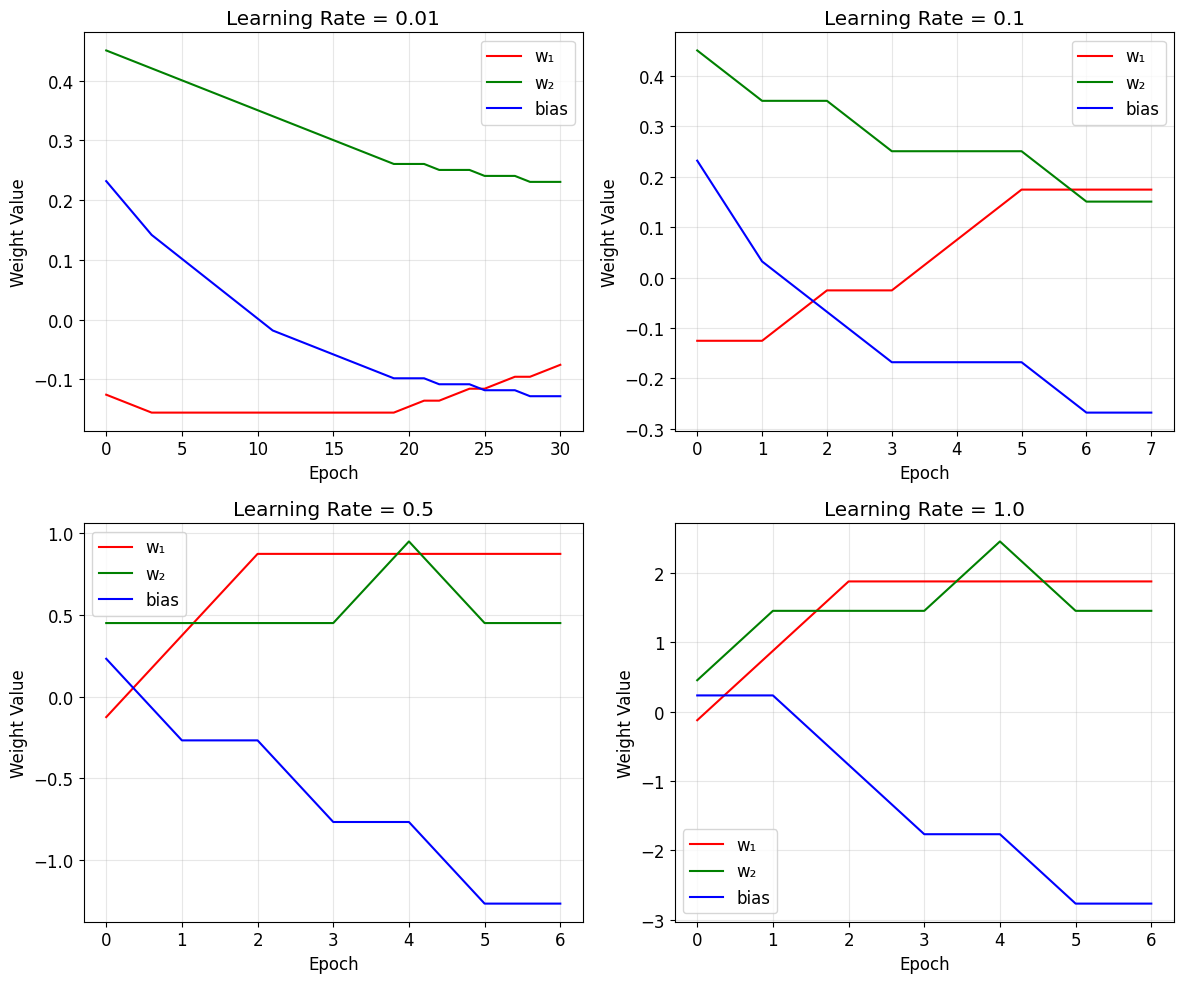

In [38]:
learning_rates = [0.01, 0.1, 0.5, 1.0]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for idx, lr in enumerate(learning_rates):
    np.random.seed(42)  # Same starting point
    p = Perceptron(n_inputs=2, learning_rate=lr)
    history = p.train(X_and, y_and, epochs=30, verbose=False)

    ax = axes[idx // 2, idx % 2]
    epochs = range(len(history))
    w1_vals = [h[0][0] for h in history]
    w2_vals = [h[0][1] for h in history]
    b_vals = [h[1] for h in history]

    ax.plot(epochs, w1_vals, 'r-', label='w₁')
    ax.plot(epochs, w2_vals, 'g-', label='w₂')
    ax.plot(epochs, b_vals, 'b-', label='bias')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Weight Value')
    ax.set_title(f'Learning Rate = {lr}')
    ax.legend()
    ax.grid(True, alpha=0.3)

    print(f"LR={lr}: Converged in {len(history)-1} epochs, Final weights: {p.weights}, bias: {p.bias:.4f}")

plt.tight_layout()
plt.savefig('learning_rate_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

## Exercise 8: 3-Input AND 

In [39]:
print("Exercise 8: 3-Input AND")
print("=" * 50)

X_and3 = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
], dtype=float)
y_and3 = np.array([0, 0, 0, 0, 0, 0, 0, 1])

np.random.seed(42)
perceptron_and3 = Perceptron(n_inputs=3, learning_rate=0.1)
history_and3 = perceptron_and3.train(X_and3, y_and3, epochs=40, verbose=False)

print(f"Training completed in {len(history_and3)-1} epochs")
print(f"Final weights: {perceptron_and3.weights}")
print(f"Final bias: {perceptron_and3.bias:.4f}\n")

print("Testing 3-input AND perceptron:")
all_correct_and3 = True
for i in range(len(X_and3)):
    pred = perceptron_and3.predict(X_and3[i])
    expected = y_and3[i]
    mark = "✓" if pred == expected else "✗"
    if pred != expected:
        all_correct_and3 = False
    print(f"Input {X_and3[i]} -> Predicted: {pred}, Expected: {expected} {mark}")
print(f"\nAll predictions correct: {all_correct_and3}")

Exercise 8: 3-Input AND
Training completed in 12 epochs
Final weights: [0.27454012 0.25071431 0.13199394]
Final bias: -0.6013

Testing 3-input AND perceptron:
Input [0. 0. 0.] -> Predicted: 0, Expected: 0 ✓
Input [0. 0. 1.] -> Predicted: 0, Expected: 0 ✓
Input [0. 1. 0.] -> Predicted: 0, Expected: 0 ✓
Input [0. 1. 1.] -> Predicted: 0, Expected: 0 ✓
Input [1. 0. 0.] -> Predicted: 0, Expected: 0 ✓
Input [1. 0. 1.] -> Predicted: 0, Expected: 0 ✓
Input [1. 1. 0.] -> Predicted: 0, Expected: 0 ✓
Input [1. 1. 1.] -> Predicted: 1, Expected: 1 ✓

All predictions correct: True


## Exercise 9: Zoo Dataset Preview

In [40]:
print("Exercise 9: Zoo Dataset Preview")
print("=" * 60)

# The Zoo dataset has 101 animals with 16 binary attributes:
# hair, feathers, eggs, milk, airborne, aquatic, predator, toothed,
# backbone, breathes, venomous, fins, legs (0,2,4,5,6,8), tail, domestic, catsize
## Plus a class label (1-7): Mammal, Bird, Reptile, Fish, Amphibian, Bug, Invertebrate

# For this exercise, we'll create a simplified binary classification:
# Can a perceptron distinguish Mammals (class 1) from Non-Mammals?

# Sample data from Zoo dataset (simplified - using key attributes)
# Format: [hair, feathers, eggs, milk, airborne, aquatic, predator, toothed,
# backbone, breathes, venomous, fins, tail, domestic, catsize]
# Note: 'legs' omitted as it's not strictly binary

# Some mammals (class 1)
mammals = np.array([
    [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1],  # aardvark
    [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1],  # antelope
    [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1],  # bear
    [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1],  # cat
    [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1],  # dog
    [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1],  # elephant
    [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1],  # deer
    [0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1],  # dolphin (no hair!)
])

# Some non-mammals
non_mammals = np.array([
    [0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0],  # chicken (bird)
    [0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0],  # hawk (bird)
    [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0],  # bass (fish)
    [0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0],  # carp (fish)
    [0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0],  # frog (amphibian)
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # honeybee (bug)
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0],  # wasp (bug)
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],  # scorpion (invertebrate)
])

X_zoo = np.vstack([mammals, non_mammals])
y_zoo = np.array([1] * len(mammals) + [0] * len(non_mammals))

print(f"Dataset: {len(X_zoo)} animals, {X_zoo.shape[1]} features")
print(f"Mammals: {sum(y_zoo)}, Non-mammals: {len(y_zoo) - sum(y_zoo)}")
print()

np.random.seed(42)
perceptron_zoo = Perceptron(n_inputs=15, learning_rate=0.1)
print("Training perceptron for Mammal vs Non-Mammal classification...")
history_zoo = perceptron_zoo.train(X_zoo, y_zoo, epochs=50, verbose=False)
print(f"Training completed in {len(history_zoo)-1} epochs.")
print()

print("Testing:")
print("-" * 50)
animal_names = [
    'aardvark', 'antelope', 'bear', 'cat', 'dog', 'elephant', 'deer', 'dolphin',
    'chicken', 'hawk', 'bass', 'carp', 'frog', 'honeybee', 'wasp', 'scorpion'
 ]
n_correct = 0
for i in range(len(X_zoo)):
    pred = perceptron_zoo.predict(X_zoo[i])
    expected = y_zoo[i]
    correct = "✓" if pred == expected else "✗"
    if pred == expected:
        n_correct += 1
    label = "Mammal" if pred == 1 else "Non-mammal"
    print(f"{animal_names[i]:12} -> Predicted: {label:11} ({pred}), Expected: {expected} {correct}")
print("-" * 50)
print(f"Accuracy: {n_correct}/{len(X_zoo)} = {n_correct/len(X_zoo)*100:.1f}%")
print()

print("Key observations:")
print("1. With 15 inputs, the decision boundary is a 14-dimensional hyperplane!")
print("2. The 'milk' attribute (index 3) is very predictive of mammals.")
print("3. A single perceptron can only do binary classification (2 classes).")
print("4. For 7-class Zoo classification, we'd need a different approach (Lab 2).")

feature_names = [
    'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
    'predator', 'toothed', 'backbone', 'breathes', 'venomous',
    'fins', 'tail', 'domestic', 'catsize'
 ]
print("\nLearned weights (magnitude indicates importance):")
sorted_indices = np.argsort(np.abs(perceptron_zoo.weights))[::-1]
for idx in sorted_indices[:5]:
    print(f" {feature_names[idx]:12}: {perceptron_zoo.weights[idx]:+.4f}")

Exercise 9: Zoo Dataset Preview
Dataset: 16 animals, 15 features
Mammals: 8, Non-mammals: 8

Training perceptron for Mammal vs Non-Mammal classification...
Training completed in 3 epochs.

Testing:
--------------------------------------------------
aardvark     -> Predicted: Mammal      (1), Expected: 1 ✓
antelope     -> Predicted: Mammal      (1), Expected: 1 ✓
bear         -> Predicted: Mammal      (1), Expected: 1 ✓
cat          -> Predicted: Mammal      (1), Expected: 1 ✓
dog          -> Predicted: Mammal      (1), Expected: 1 ✓
elephant     -> Predicted: Mammal      (1), Expected: 1 ✓
deer         -> Predicted: Mammal      (1), Expected: 1 ✓
dolphin      -> Predicted: Mammal      (1), Expected: 1 ✓
chicken      -> Predicted: Non-mammal  (0), Expected: 0 ✓
hawk         -> Predicted: Non-mammal  (0), Expected: 0 ✓
bass         -> Predicted: Non-mammal  (0), Expected: 0 ✓
carp         -> Predicted: Non-mammal  (0), Expected: 0 ✓
frog         -> Predicted: Non-mammal  (0), Expected: 0

## Exercise 10: Zoo Dataset Classification

#### Task 10.1: Load the Zoo Dataset

In [41]:
%pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# Load Zoo dataset from UCI ML Repository
zoo = fetch_ucirepo(id=111)

# Extract components
features_df = zoo.data.features
feature_names = features_df.columns.tolist()
features_raw = features_df.values

# Class labels: 1=Mammal, 2=Bird, 3=Reptile, 4=Fish, 5=Amphibian, 6=Bug, 7=Invertebrate
class_labels = zoo.data.targets.values.flatten()
animal_names = zoo.data.ids.iloc[:, 0].tolist()

# Binary target: Mammal (1) vs Non-Mammal (0)
y = (class_labels == 1).astype(int)

print(f"Dataset: {len(animal_names)} animals, {features_raw.shape[1]} features")
print(f"Mammals: {np.sum(y)}, Non-mammals: {np.sum(1-y)}")
print(f"\nFeature names: {feature_names}")
print(f"\nLegs values in dataset: {sorted(set(features_raw[:, feature_names.index('legs')]))}")
print(f"\nFirst 5 animals: {animal_names[:5]}")


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Dataset: 101 animals, 16 features
Mammals: 41, Non-mammals: 60

Feature names: ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']

Legs values in dataset: [np.int64(0), np.int64(2), np.int64(4), np.int64(5), np.int64(6), np.int64(8)]

First 5 animals: ['aardvark', 'antelope', 'bass', 'bear', 'boar']


#### Task 10.2: One-Hot Encoding for Legs

In [42]:
# Get unique leg values from the dataset
legs_idx = feature_names.index('legs')
leg_categories = sorted(set(int(x) for x in features_raw[:, legs_idx]))
print(f"Leg categories found: {leg_categories}")

def encode_legs_onehot(legs_values, categories):
    """One-hot encoding for legs using the categories found in data."""
    encoded = np.zeros((len(legs_values), len(categories)))
    for i, legs in enumerate(legs_values):
        if int(legs) in categories:
            encoded[i, categories.index(int(legs))] = 1
    return encoded

def prepare_features(X_raw, feature_names, remove_features=None):
    """Prepare features: remove specified features, one-hot encode legs."""
    if remove_features is None:
        remove_features = []

    legs_idx = feature_names.index('legs')
    legs_values = X_raw[:, legs_idx]

    remove_indices = [feature_names.index(f) for f in remove_features] + [legs_idx]
    keep_indices = [i for i in range(len(feature_names)) if i not in remove_indices]

    X_binary = X_raw[:, keep_indices].astype(float)
    X_legs = encode_legs_onehot(legs_values, leg_categories)
    X = np.hstack([X_binary, X_legs])

    kept_names = [feature_names[i] for i in keep_indices]
    legs_names = [f'legs_{c}' for c in leg_categories]
    new_feature_names = kept_names + legs_names

    return X, new_feature_names

# Prepare full feature set
X_full, feature_names_full = prepare_features(features_raw, feature_names)
print(f"\nFull feature set: {X_full.shape[1]} features")
print(f"Features: {feature_names_full}")

Leg categories found: [0, 2, 4, 5, 6, 8]

Full feature set: 21 features
Features: ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail', 'domestic', 'catsize', 'legs_0', 'legs_2', 'legs_4', 'legs_5', 'legs_6', 'legs_8']


#### Task 10.3: Train/Test Split

In [43]:
test_animals = ['dolphin', 'platypus', 'seal', 'penguin', 'frog', 'tortoise']
test_indices = [animal_names.index(name) for name in test_animals]
train_indices = [i for i in range(len(animal_names)) if i not in test_indices]

X_train_raw = features_raw[train_indices]
y_train = y[train_indices]
X_test_raw = features_raw[test_indices]
y_test = y[test_indices]
test_names = [animal_names[i] for i in test_indices]

print(f"Training set: {len(X_train_raw)} animals")
print(f"Test set: {len(X_test_raw)} animals")
print("\nTest animals and their true labels (1=mammal):")
for name, label in zip(test_names, y_test):
    print(f" {name}: {label}")

Training set: 95 animals
Test set: 6 animals

Test animals and their true labels (1=mammal):
 dolphin: 1
 platypus: 1
 seal: 1
 penguin: 0
 frog: 0
 tortoise: 0


#### Task 10.4: Experiment 1 - All Features (Including Milk)

In [44]:
X_train_all, feat_names_all = prepare_features(
    X_train_raw, feature_names, remove_features=[]
)
X_test_all, _ = prepare_features(
    X_test_raw, feature_names, remove_features=[]
)

y_train_2d = y_train.reshape(-1, 1)

print("Experiment 1: All features (including milk)")
print("=" * 50)
print(f"Features ({len(feat_names_all)}): {feat_names_all}")

np.random.seed(42)
mlp_all = TwoLayerPerceptron(
    input_size=X_train_all.shape[1], hidden_size=16, learning_rate=0.5
)
losses_all = mlp_all.train(X_train_all, y_train_2d, epochs=3000, verbose_interval=1000)

train_pred = mlp_all.predict(X_train_all)
train_acc = np.mean(train_pred == y_train) * 100
test_pred = mlp_all.predict(X_test_all)
test_acc = np.mean(test_pred == y_test) * 100

print(f"\nTraining accuracy: {train_acc:.1f}%")
print(f"Test accuracy: {test_acc:.1f}%")
print("\nTest predictions:")
for name, pred, true in zip(test_names, test_pred, y_test):
    correct = '✓' if pred == true else '✗'
    print(f" {name:12s}: predicted={pred}, actual={true} {correct}")

Experiment 1: All features (including milk)
Features (21): ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail', 'domestic', 'catsize', 'legs_0', 'legs_2', 'legs_4', 'legs_5', 'legs_6', 'legs_8']
Epoch 0: Loss = 0.304658
Epoch 1000: Loss = 0.002239
Epoch 2000: Loss = 0.000949

Training accuracy: 100.0%
Test accuracy: 100.0%

Test predictions:
 dolphin     : predicted=1, actual=1 ✓
 platypus    : predicted=1, actual=1 ✓
 seal        : predicted=1, actual=1 ✓
 penguin     : predicted=0, actual=0 ✓
 frog        : predicted=0, actual=0 ✓
 tortoise    : predicted=0, actual=0 ✓


#### Task 10.5: Experiment 2 - Remove "Milk"

In [45]:
X_train_no_milk, feat_names_no_milk = prepare_features(
    X_train_raw, feature_names, remove_features=['milk']
)
X_test_no_milk, _ = prepare_features(
    X_test_raw, feature_names, remove_features=['milk']
)

print("Experiment 2: Without 'milk'")
print("=" * 50)
print(f"Features ({len(feat_names_no_milk)}): {feat_names_no_milk}")

np.random.seed(42)
mlp_no_milk = TwoLayerPerceptron(
    input_size=X_train_no_milk.shape[1], hidden_size=16, learning_rate=0.5
)
losses_no_milk = mlp_no_milk.train(
    X_train_no_milk, y_train_2d, epochs=3000, verbose_interval=1000
)

train_pred = mlp_no_milk.predict(X_train_no_milk)
train_acc = np.mean(train_pred == y_train) * 100
test_pred = mlp_no_milk.predict(X_test_no_milk)
test_acc = np.mean(test_pred == y_test) * 100

print(f"\nTraining accuracy: {train_acc:.1f}%")
print(f"Test accuracy: {test_acc:.1f}%")
print("\nTest predictions:")
for name, pred, true in zip(test_names, test_pred, y_test):
    correct = '✓' if pred == true else '✗'
    print(f" {name:12s}: predicted={pred}, actual={true} {correct}")

X_train_reduced, feat_names_reduced = prepare_features(
    X_train_raw, feature_names, remove_features=['milk', 'hair', 'eggs']
)
X_test_reduced, _ = prepare_features(
    X_test_raw, feature_names, remove_features=['milk', 'hair', 'eggs']
)

print("\nExperiment 3: Without 'milk', 'hair', and 'eggs'")
print("=" * 50)
print(f"Features ({len(feat_names_reduced)}): {feat_names_reduced}")

np.random.seed(42)
mlp_reduced = TwoLayerPerceptron(
    input_size=X_train_reduced.shape[1], hidden_size=16, learning_rate=0.5
)
losses_reduced = mlp_reduced.train(
    X_train_reduced, y_train_2d, epochs=5000, verbose_interval=1000
)

train_pred = mlp_reduced.predict(X_train_reduced)
train_acc = np.mean(train_pred == y_train) * 100
test_pred = mlp_reduced.predict(X_test_reduced)
test_acc = np.mean(test_pred == y_test) * 100

print(f"\nTraining accuracy: {train_acc:.1f}%")
print(f"Test accuracy: {test_acc:.1f}%")
print("\nTest predictions:")
for name, pred, true in zip(test_names, test_pred, y_test):
    correct = '✓' if pred == true else '✗'
    print(f" {name:12s}: predicted={pred}, actual={true} {correct}")

Experiment 2: Without 'milk'
Features (20): ['hair', 'feathers', 'eggs', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail', 'domestic', 'catsize', 'legs_0', 'legs_2', 'legs_4', 'legs_5', 'legs_6', 'legs_8']
Epoch 0: Loss = 0.216758
Epoch 1000: Loss = 0.008392
Epoch 2000: Loss = 0.002289

Training accuracy: 100.0%
Test accuracy: 83.3%

Test predictions:
 dolphin     : predicted=1, actual=1 ✓
 platypus    : predicted=0, actual=1 ✗
 seal        : predicted=1, actual=1 ✓
 penguin     : predicted=0, actual=0 ✓
 frog        : predicted=0, actual=0 ✓
 tortoise    : predicted=0, actual=0 ✓

Experiment 3: Without 'milk', 'hair', and 'eggs'
Features (18): ['feathers', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail', 'domestic', 'catsize', 'legs_0', 'legs_2', 'legs_4', 'legs_5', 'legs_6', 'legs_8']
Epoch 0: Loss = 0.249187
Epoch 1000: Loss = 0.020826
Epoch 2000: Loss = 0.014094
Epoch 3000: Loss = 0.011

#### Task 10.6: Experiment 3 - Remove "Milk", "Hair", and "Eggs"

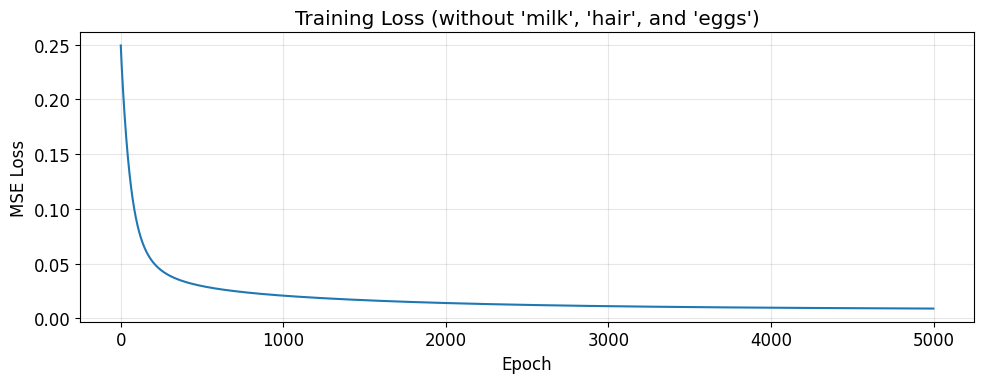

In [46]:
# Plot training loss for Experiment 3
plt.figure(figsize=(10, 4))
plt.plot(losses_reduced)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title("Training Loss (without 'milk', 'hair', and 'eggs')")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

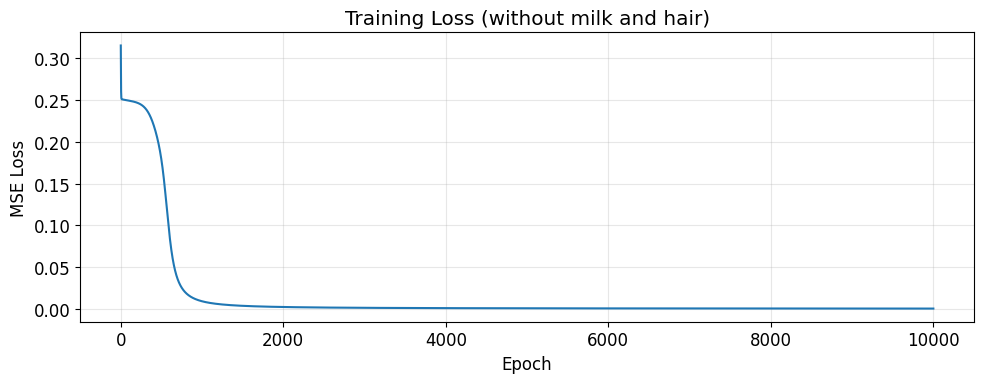

In [47]:
# Plot training loss
plt.figure(figsize=(10, 4))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss (without milk and hair)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### Task 10.7: Analysis - The Platypus Problem

In [49]:
platypus_idx = animal_names.index('platypus')
platypus_features = features_raw[platypus_idx]

print("Platypus features:")
print("=" * 40)
for name, val in zip(feature_names, platypus_features):
    marker = "← unusual for mammal!" if (name == 'eggs' and val == 1) else ""
    print(f" {name:12s}: {int(val)} {marker}")

print("\nClass: Mammal (class 1)")
print("\nThe platypus is a monotreme - a mammal that lays eggs!")
print("This makes it an outlier that confuses the classifier.")

Platypus features:
 hair        : 1 
 feathers    : 0 
 eggs        : 1 ← unusual for mammal!
 milk        : 1 
 airborne    : 0 
 aquatic     : 1 
 predator    : 1 
 toothed     : 0 
 backbone    : 1 
 breathes    : 1 
 venomous    : 0 
 fins        : 0 
 legs        : 4 
 tail        : 1 
 domestic    : 0 
 catsize     : 1 

Class: Mammal (class 1)

The platypus is a monotreme - a mammal that lays eggs!
This makes it an outlier that confuses the classifier.
